In [1]:
# import all the required library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Read all the dataset
orders_df = pd.read_csv(r"F:\Data Science\Innomatics Research Lab\SEPTEMBER INTERNSHIP\Data Analysis and Problem Solving\Last Mile Delivery Analysis\diminos_data_v2\diminos_data_v2\orders.csv")
delivery_df = pd.read_csv(r"F:\Data Science\Innomatics Research Lab\SEPTEMBER INTERNSHIP\Data Analysis and Problem Solving\Last Mile Delivery Analysis\diminos_data_v2\diminos_data_v2\deliveries.csv")
order_items_df = pd.read_csv(r"F:\Data Science\Innomatics Research Lab\SEPTEMBER INTERNSHIP\Data Analysis and Problem Solving\Last Mile Delivery Analysis\diminos_data_v2\diminos_data_v2\order_items.csv")
products_df = pd.read_csv(r"F:\Data Science\Innomatics Research Lab\SEPTEMBER INTERNSHIP\Data Analysis and Problem Solving\Last Mile Delivery Analysis\diminos_data_v2\diminos_data_v2\products.csv")

In [3]:
# Initial Data Exploration and Summary

In [4]:
# Remove the leading and trailing spaces in the columns' name
orders_df.columns = orders_df.columns.str.strip()
order_items_df.columns = order_items_df.columns.str.strip()
delivery_df.columns = delivery_df.columns.str.strip()
products_df.columns = products_df.columns.str.strip()

In [5]:
# Not there won't be any leading or trailing spaces in the columns' name

In [6]:
products_df.head()

,item_id,category,Item,Size,Price
0,p_001,Veg,Margherita,Regular,109
1,p_002,Veg,Margherita,Medium,245
2,p_003,Veg,Margherita,Large,455
3,p_004,Veg,Double Cheese Margherita,Regular,215
4,p_005,Veg,Double Cheese Margherita,Medium,385


In [7]:
products_df.shape

(37, 5)

In [8]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   37 non-null     object
 1   category  37 non-null     object
 2   Item      37 non-null     object
 3   Size      37 non-null     object
 4   Price     37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [9]:
# Check for the null values
products_df.isnull().sum()

item_id     0
category    0
Item        0
Size        0
Price       0
dtype: int64

In [10]:
products_df[products_df.isnull().any(axis = 1)]

,item_id,category,Item,Size,Price


In [11]:
# Products dataset doesn't contain any null values.

In [12]:
order_items_df.head()

,order_id,items_ordered
0,321230114,"['p_025', 'p_032', 'p_037']"
1,321230115,"['p_017', 'p_012']"
2,321230116,"['p_027', 'p_037']"
3,321230117,"['p_004', 'p_029']"
4,321230118,"['p_017', 'p_037']"


In [13]:
order_items_df.shape

(454336, 2)

In [14]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454336 entries, 0 to 454335
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   order_id       454336 non-null  int64 
 1   items_ordered  454336 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.9+ MB


In [15]:
order_items_df.isnull().sum()

order_id         0
items_ordered    0
dtype: int64

In [16]:
order_items_df[order_items_df.isnull().any(axis = 1)]

,order_id,items_ordered


In [17]:
# Order_items dataset doesn't contain any null values

In [18]:
orders_df.head()

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20


In [19]:
orders_df.shape

(454336, 2)

In [20]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454336 entries, 0 to 454335
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   order_id         454336 non-null  int64 
 1   order_placed_at  454336 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.9+ MB


In [21]:
# Here the datatype of order_placed_at is not correct, needed to fix it
orders_df["order_placed_at"] = pd.to_datetime(orders_df["order_placed_at"])

In [22]:
# Check for the datatypes
orders_df["order_placed_at"].dtypes

dtype('<M8[ns]')

In [23]:
orders_df.isnull().sum()

order_id           0
order_placed_at    0
dtype: int64

In [24]:
orders_df[orders_df.isnull().any(axis = 1)]

,order_id,order_placed_at


In [25]:
# Orders dataset doesn't contain any kind of null values

In [26]:
delivery_df.head()

,order_id,time_stamp,status
0,321230114,2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:19:13.299151076,Delivered
3,321230115,2020-12-11 00:36:02.000000000,Pending
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery


In [27]:
delivery_df.shape

(1363008, 3)

In [28]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363008 entries, 0 to 1363007
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   order_id    1363008 non-null  int64 
 1   time_stamp  1363008 non-null  object
 2   status      1363008 non-null  object
dtypes: int64(1), object(2)
memory usage: 31.2+ MB


In [29]:
# Convert the datatype of time_stamp from object to datetime
delivery_df["time_stamp"] = pd.to_datetime(delivery_df["time_stamp"])

In [30]:
delivery_df["time_stamp"].dtype

dtype('<M8[ns]')

In [31]:
delivery_df.isnull().sum()

order_id      0
time_stamp    0
status        0
dtype: int64

In [32]:
delivery_df[delivery_df.isnull().any(axis = 1)]

,order_id,time_stamp,status


In [33]:
# Even delivery dataset doesn't contain any sort of null values

In [34]:
# None of datasets contain any sort of NULL values, now data is ready for the analysis 

In [35]:
products_df.head(2)

,item_id,category,Item,Size,Price
0,p_001,Veg,Margherita,Regular,109
1,p_002,Veg,Margherita,Medium,245


In [36]:
orders_df.head(2)

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02


In [37]:
order_items_df.head(2)

,order_id,items_ordered
0,321230114,"['p_025', 'p_032', 'p_037']"
1,321230115,"['p_017', 'p_012']"


In [38]:
delivery_df.head(2)

,order_id,time_stamp,status
0,321230114,2020-12-11 00:01:29,Pending
1,321230114,2020-12-11 00:06:29,Out For Delivery


In [39]:
# For better understanding let's print the name of columns of each dataset
print("Columns Name in Products Dataset: ", products_df.columns)
print("Columns Name in Orders Dataset: ", orders_df.columns)
print("Columns Name in Orders Items Dataset: ", order_items_df.columns)
print("Columns Name in Delivery Dataset: ", delivery_df.columns)

Columns Name in Products Dataset:  Index(['item_id', 'category', 'Item', 'Size', 'Price'], dtype='object')
Columns Name in Orders Dataset:  Index(['order_id', 'order_placed_at'], dtype='object')
Columns Name in Orders Items Dataset:  Index(['order_id', 'items_ordered'], dtype='object')
Columns Name in Delivery Dataset:  Index(['order_id', 'time_stamp', 'status'], dtype='object')


In [40]:
# Merge all the dataset and make it one for the convenience in data analysis
merged_df = pd.merge(orders_df, order_items_df, on = "order_id", how = "inner")
dataset = pd.merge(merged_df, delivery_df, on = "order_id", how = "inner")

In [41]:
dataset.shape

(1363008, 5)

In [42]:
# Check if there is any null value present in the final dataset
dataset.isnull().sum()

order_id           0
order_placed_at    0
items_ordered      0
time_stamp         0
status             0
dtype: int64

In [43]:
dataset.head()

,order_id,order_placed_at,items_ordered,time_stamp,status
0,321230114,2020-12-11 00:01:29,"['p_025', 'p_032', 'p_037']",2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:01:29,"['p_025', 'p_032', 'p_037']",2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:01:29,"['p_025', 'p_032', 'p_037']",2020-12-11 00:19:13.299151076,Delivered
3,321230115,2020-12-11 00:36:02,"['p_017', 'p_012']",2020-12-11 00:36:02.000000000,Pending
4,321230115,2020-12-11 00:36:02,"['p_017', 'p_012']",2020-12-11 00:41:02.000000000,Out For Delivery


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1363008 entries, 0 to 1363007
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   order_id         1363008 non-null  int64         
 1   order_placed_at  1363008 non-null  datetime64[ns]
 2   items_ordered    1363008 non-null  object        
 3   time_stamp       1363008 non-null  datetime64[ns]
 4   status           1363008 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 62.4+ MB


##### 1. What is the average Delivery Time (in minutes) taken by the store to deliver the Pizza?

In [45]:
# Adding a new column for time taken to deliver the pizza in minutes
dataset["Delivery_minute"] = round((dataset["time_stamp"] - dataset["order_placed_at"]).dt.total_seconds()/60, 2)

# Average Delivery Time(in minutes) to deliver the pizzas
delivery_time = dataset["Delivery_minute"].mean()
print(f"Average Time taken to deliver the pizzas: {delivery_time:.2f}")

Average Time taken to deliver the pizzas: 8.55


##### 2. What is the 99th percentile Delivery Time (in minutes) taken by the store to deliver the Pizza?

In [46]:
percentile_99_delivery_time  = dataset["Delivery_minute"].quantile(0.99)
print("99th percentile Delivery Time(in minutes) is: {:.2f}".format(percentile_99_delivery_time))

99th percentile Delivery Time(in minutes) is: 27.75


###### Observation: 
- Around 99% of the pizza were delivered within 30 minutes. 

##### 3. Which metric is the better choice to determine the stores performance based on Delivery Time?

- a. Mean
- b. Median
- c. 95th or 99th Percentile
- d. None of the above

###### Answer: c

##### 4. What is the order id with the maximum delivery time?

In [47]:
# Find the index of the row with the maximum delivery time
max_delivery_idx = dataset["Delivery_minute"].idxmax()

# Extract the 'order_id' from the corresponding row
order_id_max_delivery = dataset.loc[max_delivery_idx, "order_id"]

# Extract the maximum delivery time
max_delivery_time = dataset.loc[max_delivery_idx, "Delivery_minute"]

print(f"Order ID with the maximum delivery time: {order_id_max_delivery}")
print(f"Maximum delivery time: {max_delivery_time} minutes")

Order ID with the maximum delivery time: 321629049
Maximum delivery time: 62.91 minutes


##### 5. How many pizza's were ordered between 1st January and 31st January 2024 (INCLUSIVE)?

In [48]:
# Define the start and end dates for the January order filtering
start_date = "2024-01-01"
end_date = "2024-01-31"

# Filter the dataset to get all orders placed in January 2024
total_jan_orders = dataset[(dataset["order_placed_at"] >= start_date) & (dataset["order_placed_at"] <= end_date)]

# Define a lambda function that calculates the number of items ordered from a string representation
lambda_fun = lambda x: len(eval(x))

# Apply the lambda function to the 'items_ordered' column of the filtered orders,
# and sum up the total number of items ordered within January
total_orders_within_jan = total_jan_orders["items_ordered"].apply(lambda_fun).sum()

In [49]:
print("The total orders placed in the month of Jan is : {}".format(total_orders_within_jan))

The total orders placed in the month of Jan is : 91008


##### 6. How many order took more than 30 minutes to deliver between 1st January and 31st January 2024 (INCLUSIVE)?

In [50]:
orders_delivery_more_than_30_mins = total_jan_orders[total_jan_orders["Delivery_minute"] > 30]
number_of_orders = len(orders_delivery_more_than_30_mins)
print(f"The total number of orders that were delivered in more than 30 minutes: {number_of_orders}")

The total number of orders that were delivered in more than 30 minutes: 158


##### 7. What is the total amount Pizza store lost in 2023 due to refunds on late deliveries?

In [51]:
import ast

# Convert the 'items_ordered' column from strings to actual lists
dataset["items_ordered"] = dataset["items_ordered"].apply(ast.literal_eval)

# Now explode the 'items_ordered' lists into separate rows
dataset_exploded = dataset.explode("items_ordered")

In [52]:
dataset_exploded.head()

,order_id,order_placed_at,items_ordered,time_stamp,status,Delivery_minute
0,321230114,2020-12-11 00:01:29,p_025,2020-12-11 00:01:29,Pending,0.0
0,321230114,2020-12-11 00:01:29,p_032,2020-12-11 00:01:29,Pending,0.0
0,321230114,2020-12-11 00:01:29,p_037,2020-12-11 00:01:29,Pending,0.0
1,321230114,2020-12-11 00:01:29,p_025,2020-12-11 00:06:29,Out For Delivery,5.0
1,321230114,2020-12-11 00:01:29,p_032,2020-12-11 00:06:29,Out For Delivery,5.0


In [53]:
dataset_exploded.shape

(3476679, 6)

In [54]:
# Merge the dataset with products_df on item_id, performing a left join to retain all orders
dataset = dataset_exploded.merge(products_df, left_on = "items_ordered", right_on = "item_id", how = "left")

In [55]:
dataset.shape

(3476679, 11)

In [56]:
dataset.isnull().sum()

order_id           0
order_placed_at    0
items_ordered      0
time_stamp         0
status             0
Delivery_minute    0
item_id            0
category           0
Item               0
Size               0
Price              0
dtype: int64

In [57]:
# There is no null values

In [58]:
dataset.head()

,order_id,order_placed_at,items_ordered,time_stamp,status,Delivery_minute,item_id,category,Item,Size,Price
0,321230114,2020-12-11 00:01:29,p_025,2020-12-11 00:01:29,Pending,0.0,p_025,Non Veg,Chicken Dominator,Regular,365
1,321230114,2020-12-11 00:01:29,p_032,2020-12-11 00:01:29,Pending,0.0,p_032,Non Veg,Indi Chicken Tikka,Medium,599
2,321230114,2020-12-11 00:01:29,p_037,2020-12-11 00:01:29,Pending,0.0,p_037,Veg,Coke,Regular,71
3,321230114,2020-12-11 00:01:29,p_025,2020-12-11 00:06:29,Out For Delivery,5.0,p_025,Non Veg,Chicken Dominator,Regular,365
4,321230114,2020-12-11 00:01:29,p_032,2020-12-11 00:06:29,Out For Delivery,5.0,p_032,Non Veg,Indi Chicken Tikka,Medium,599


In [59]:
orders_2023 = dataset[dataset["order_placed_at"].dt.year == 2023]
late_delivery_pizzas = orders_2023[orders_2023["Delivery_minute"] > 30]
total_loss_2023 = late_delivery_pizzas["Price"].sum()

In [60]:
# Alternative way of filtering the dataset 
# start_date = "2023-01-01"
# end_date = "2024-01-01"

# dataset[(dataset["order_placed_at"] >= start_date) & (dataset["order_placed_at"] < end_date)]

In [61]:
print("Total loss of amount in 2023 occurred in thousand: {}".format(total_loss_2023))

Total loss of amount in 2023 occurred in thousand: 1820201


##### 8. In which year Pizza store has lost maximum amount due to refunds on late deliveries?

In [62]:
# Filter the dataset of late deliveries
late_delivery_orders = dataset[dataset["Delivery_minute"] > 30]
# Create a full copy
late_delivery_orders = late_delivery_orders.copy()
# Now add the column
late_delivery_orders["Year"] = late_delivery_orders["order_placed_at"].dt.year
# Calculate loss per year with the help of group by 
loss_per_year = late_delivery_orders.groupby("Year")["Price"].sum()
# Find the year with the maximum loss
max_loss_year = loss_per_year.idxmax()
# Find the amount of loss due to refund
max_loss_amount = loss_per_year.max()
print(f"Year with the maximum amount lost due to refunds on late deliveries: {max_loss_year} (₹{max_loss_amount:.2f})")

Year with the maximum amount lost due to refunds on late deliveries: 2023 (₹1820201.00)


##### 9. How much revenue is generated by the pizza store till date? Don't include the refund amount in revenue.

In [63]:
# Filteration of the pizzas delivered within 30 minutes
orders_less_than_30_mins = dataset[dataset["Delivery_minute"] < 30]
# Filter out the data that were delivered
orders_delivered_on_time = orders_less_than_30_mins[orders_less_than_30_mins["status"] == "Delivered"]
# Calculate total revenue of the orders delivered within 30 minutes
total_revenue = orders_delivered_on_time["Price"].sum()
print(f"Total revenue generated by the pizza store till date (excluding refunds): ₹{total_revenue:.2f}")

Total revenue generated by the pizza store till date (excluding refunds): ₹402295677.00


###### `Bonus Question:` Which distribution can be used to model the number of orders incoming each hour? If we can somehow model it, which problem for owner of Pizza Store can be solved?

In [65]:
# Extract the year, date, and hour from the order_placed_at timestamp
dataset["Year"] = dataset["order_placed_at"].dt.year
dataset["Date"] = dataset["order_placed_at"].dt.date
dataset["Hour"] = dataset["order_placed_at"].dt.hour

# Sort the dataset by order_placed_at for accurate ordering
sorted_dataset = dataset.sort_values(by="order_placed_at")

# Remove duplicate orders, keeping only the first instance of each order_id
unique_orders_dataset = sorted_dataset.drop_duplicates(subset="order_id", keep="first")

# Group the data by Year, Date, and Hour to count the number of unique orders per hour
orders_per_hour = unique_orders_dataset.groupby(["Year", "Date", "Hour"]).size().reset_index(name="Number_of_orders")

# Calculate the average number of orders per day from the grouped data
average_orders_per_hour = orders_per_hour["Number_of_orders"].mean()

# Print the average number of orders per day, rounded to the nearest whole number
print(f"The average number of orders per hour is: {round(average_orders_per_hour)}")

The average number of orders per hour is: 17


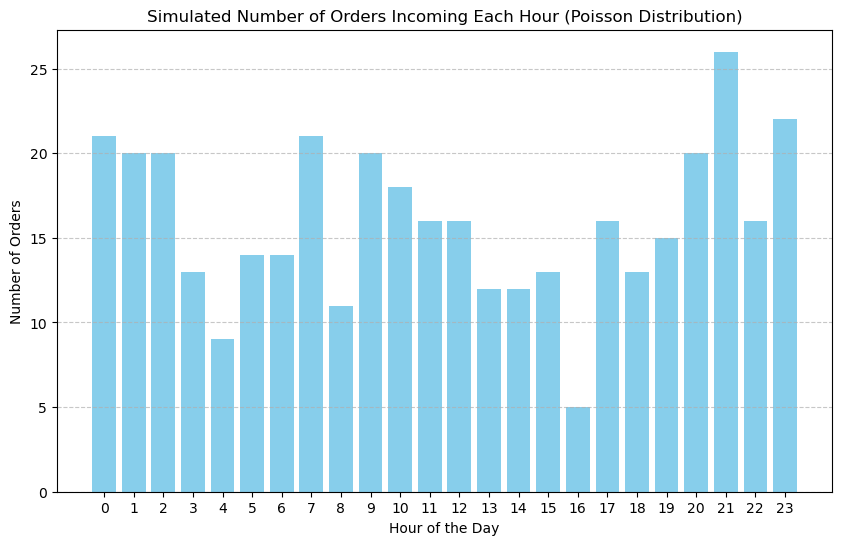

In [66]:
# Simulate number of orders for a day (24 hours)
orders_per_hour = np.random.poisson(average_orders_per_hour, 24)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(range(24), orders_per_hour, color = "skyblue")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.title("Simulated Number of Orders Incoming Each Hour (Poisson Distribution)")
plt.xticks(range(24))
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.show()


##### Problem Solved for the Pizza Store Owner:

- `Staffing Decisions:` Predicting hourly orders helps manage staffing levels during peak times, improving service efficiency.

- `Inventory Management:` Analyzing order patterns aids in stocking popular items and reducing food wastage.

- `Delivery Planning:` Accurate predictions optimize delivery logistics and personnel allocation during high-demand periods.

- `Financial Forecasting:` Understanding order trends enhances revenue forecasting and marketing strategy adjustments.